In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [142]:
df=pd.read_csv("/content/drive/MyDrive/nmims/sem1/aiml/kshamta mam/16-11-24-unsupervised/Live.csv")

In [143]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [144]:
df.isnull().mean()*100

,0
status_id,0.0
status_type,0.0
status_published,0.0
num_reactions,0.0
num_comments,0.0
num_shares,0.0
num_likes,0.0
num_loves,0.0
num_wows,0.0
num_hahas,0.0


In [145]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [146]:
df.drop(columns=['Column1', 'Column2', 'Column3',
       'Column4'],inplace=True)

In [147]:
df.status_id.value_counts()

,count
status_id,
819700534875473_957599447752247,2
819700534875473_972433889602136,2
819700534875473_981835315328660,2
819700534875473_980941638751361,2
819700534875473_978746665637525,2
...,...
246675545449582_264078163709320,1
246675545449582_264081010375702,1
246675545449582_264089710374832,1


In [148]:
df['status_id'].nunique()

6997

In [149]:
df['status_type'].nunique()

4

In [150]:
df['status_published'].nunique()

6913

In [151]:
df.drop(columns=['status_id','status_published'],inplace=True)

In [152]:
df.status_type.value_counts()

,count
status_type,
photo,4288
video,2334
status,365
link,63


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [154]:
X=df.drop('status_type',axis=1)

In [155]:
y=df['status_type']

In [156]:
le=LabelEncoder()

In [157]:
y=le.fit_transform(y)

In [158]:
summary=X.describe()

In [159]:
print(summary)

       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000     0.000000  
25%   

In [160]:
sc=MinMaxScaler()


In [161]:
X_scaled=sc.fit_transform(X)

In [162]:
kmeans=KMeans(n_clusters=100,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=100, random_state=42)

In [163]:
kmeans.cluster_centers_

array([[ 1.98020505e-02,  6.58483151e-04,  7.85511413e-04,
         1.93636098e-02,  1.90400208e-03,  2.09943569e-03,
         1.20758648e-03,  7.28916102e-04,  1.19918455e-04],
       [ 2.58208999e-01,  3.02427118e-03,  3.53667904e-03,
         2.57080534e-01,  3.62794771e-03,  9.60875136e-03,
         1.13428148e-03,  1.07440236e-03,  8.83782589e-04],
       [ 4.33697301e-01,  1.56605186e-02,  3.88017356e-03,
         4.20958447e-01,  4.02261361e-02,  1.14080164e-01,
         1.18289354e-02,  0.00000000e+00,  0.00000000e+00],
       [ 2.13163482e-01,  3.22598063e-01,  2.86068925e-01,
         1.51840057e-01,  3.90410959e-01,  5.57553957e-02,
         8.81104034e-02,  2.94117647e-02,  4.83870968e-02],
       [ 6.73080326e-02,  4.77390027e-02,  3.44261098e-02,
         5.37376150e-02,  8.97704211e-02,  6.22002398e-03,
         1.57908705e-02,  9.80392157e-03,  7.39247312e-03],
       [ 3.78650625e-01,  8.06733365e-02,  1.68289200e-01,
         3.15498938e-01,  4.08422121e-01,  5.315747

In [164]:
#inertia
#the lower the inertia the better the model
kmeans.inertia_

4.241699521781672

In [165]:
silhouette_avg=silhouette_score(X_scaled,kmeans.labels_)

In [166]:
print(f'Silhouette Score for 100 clusters:{silhouette_avg}')

Silhouette Score for 100 clusters:0.4204205604395289


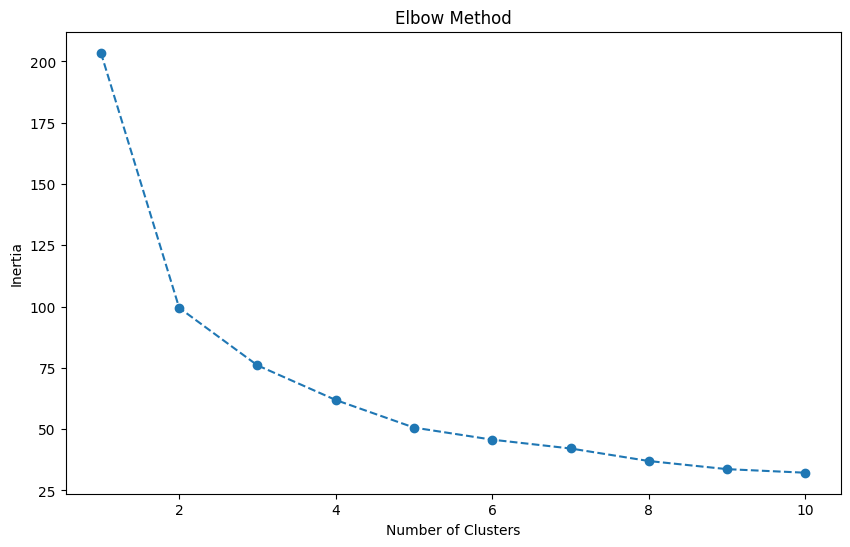

In [170]:
intertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(X_scaled)
  intertia.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1,11),intertia,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [181]:
kmeans2=KMeans(n_clusters=3,random_state=42)
kmeans2.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [182]:
labels=kmeans2.labels_

correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled."%(correct_labels,y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size)))

Result: 118 out of 7050 samples were correctly labeled.
Accuracy score: 0.02
